In [30]:
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam as LegacyAdam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf


This Data contains around 25k images of size 150x150 distributed under 6 categories.

{'buildings' -> 0, 

'forest' -> 1,

'glacier' -> 2,

'mountain' -> 3,

'sea' -> 4,

'street' -> 5 }

Data is already split into 14k seg_train and 3k in seg_test

In [31]:
train_path='seg_train/seg_train/'
test_path='seg_test/seg_test/'


In [32]:
#batch size = 32
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [33]:
#3 layers of convolutional filter size 32,64,128 or 32,32,64?

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

In [34]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 17, 17, 128)      

In [35]:
#Use LegacyAdam for M1 Mac

optimizer=LegacyAdam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
#epoch size 50/100(optimally), setting at 10 for trial, batch size 32
history = model.fit(
        train_generator,
        epochs=10,
        batch_size=32,
        validation_data=test_generator)


Epoch 1/10


2023-05-22 21:32:48.608465: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


439/439 [==============================] - ETA: 0s - loss: 1.3522 - accuracy: 0.4650

2023-05-22 21:34:36.834800: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


439/439 [==============================] - 116s 264ms/step - loss: 1.3522 - accuracy: 0.4650 - val_loss: 1.0798 - val_accuracy: 0.6130
Epoch 2/10
439/439 [==============================] - 140s 319ms/step - loss: 1.1088 - accuracy: 0.5792 - val_loss: 0.8720 - val_accuracy: 0.7063
Epoch 3/10
439/439 [==============================] - 138s 314ms/step - loss: 1.0039 - accuracy: 0.6198 - val_loss: 0.8026 - val_accuracy: 0.7123
Epoch 4/10
439/439 [==============================] - 144s 329ms/step - loss: 0.9328 - accuracy: 0.6512 - val_loss: 0.7388 - val_accuracy: 0.7320
Epoch 5/10
439/439 [==============================] - 159s 362ms/step - loss: 0.8752 - accuracy: 0.6724 - val_loss: 0.6740 - val_accuracy: 0.7693
Epoch 6/10
439/439 [==============================] - 157s 357ms/step - loss: 0.8345 - accuracy: 0.6931 - val_loss: 0.6981 - val_accuracy: 0.7500
Epoch 7/10
439/439 [==============================] - 163s 370ms/step - loss: 0.8026 - accuracy: 0.7025 - val_loss: 0.6209 - val_accura

In [39]:
#save model jic anything happens idw run for 10 years again
model.save('ImageClassModel.keras')

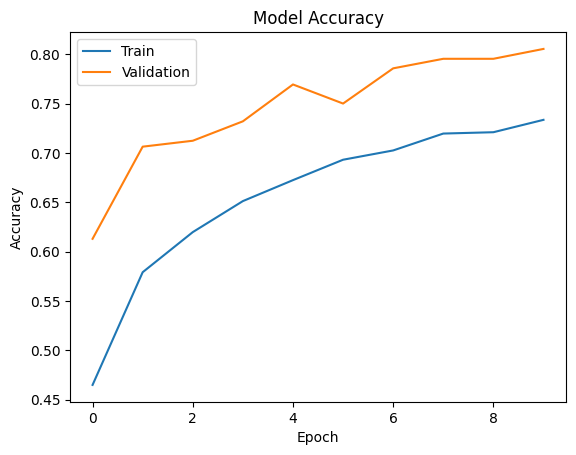

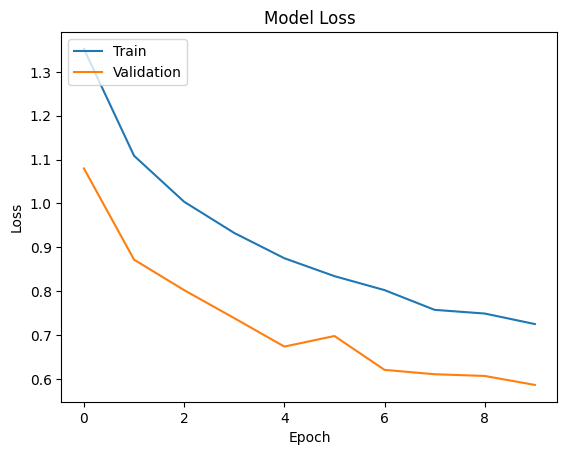

In [40]:
trained = history.history

plt.plot(trained['accuracy'])
plt.plot(trained['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(trained['loss'])
plt.plot(trained['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [41]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

 2/94 [..............................] - ETA: 6s - loss: 0.6158 - accuracy: 0.7812

2023-05-22 21:58:45.312166: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


94/94 [==============================] - 8s 85ms/step - loss: 0.5866 - accuracy: 0.8053
Test Loss: 0.5866270661354065
Test Accuracy: 0.8053333163261414


In [42]:
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)

 1/94 [..............................] - ETA: 13s

2023-05-22 21:59:20.615624: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


94/94 [==============================] - 8s 83ms/step


In [43]:
class_labels = list(train_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=class_labels))

              precision    recall  f1-score   support

   buildings       0.15      0.13      0.14       437
      forest       0.19      0.19      0.19       474
     glacier       0.20      0.21      0.21       553
    mountain       0.17      0.19      0.18       525
         sea       0.16      0.15      0.15       510
      street       0.20      0.20      0.20       501

    accuracy                           0.18      3000
   macro avg       0.18      0.18      0.18      3000
weighted avg       0.18      0.18      0.18      3000



In [44]:
cm = confusion_matrix(test_generator.classes, y_pred)

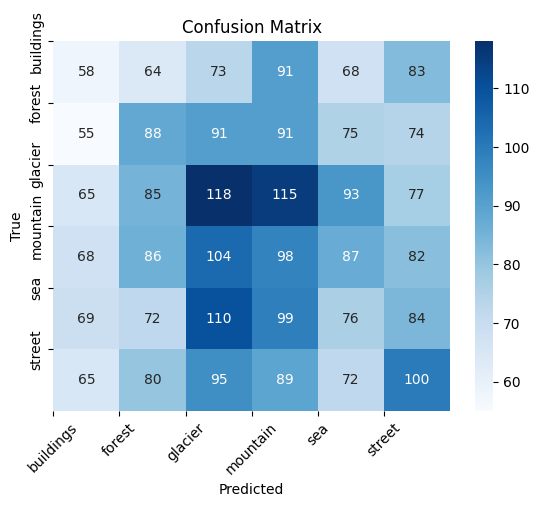

In [45]:
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

class_labels = list(train_generator.class_indices.keys())
plt.xticks(np.arange(len(class_labels)), class_labels, rotation=45)
plt.yticks(np.arange(len(class_labels)), class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()

1/1 [==============================] - 0s 13ms/step


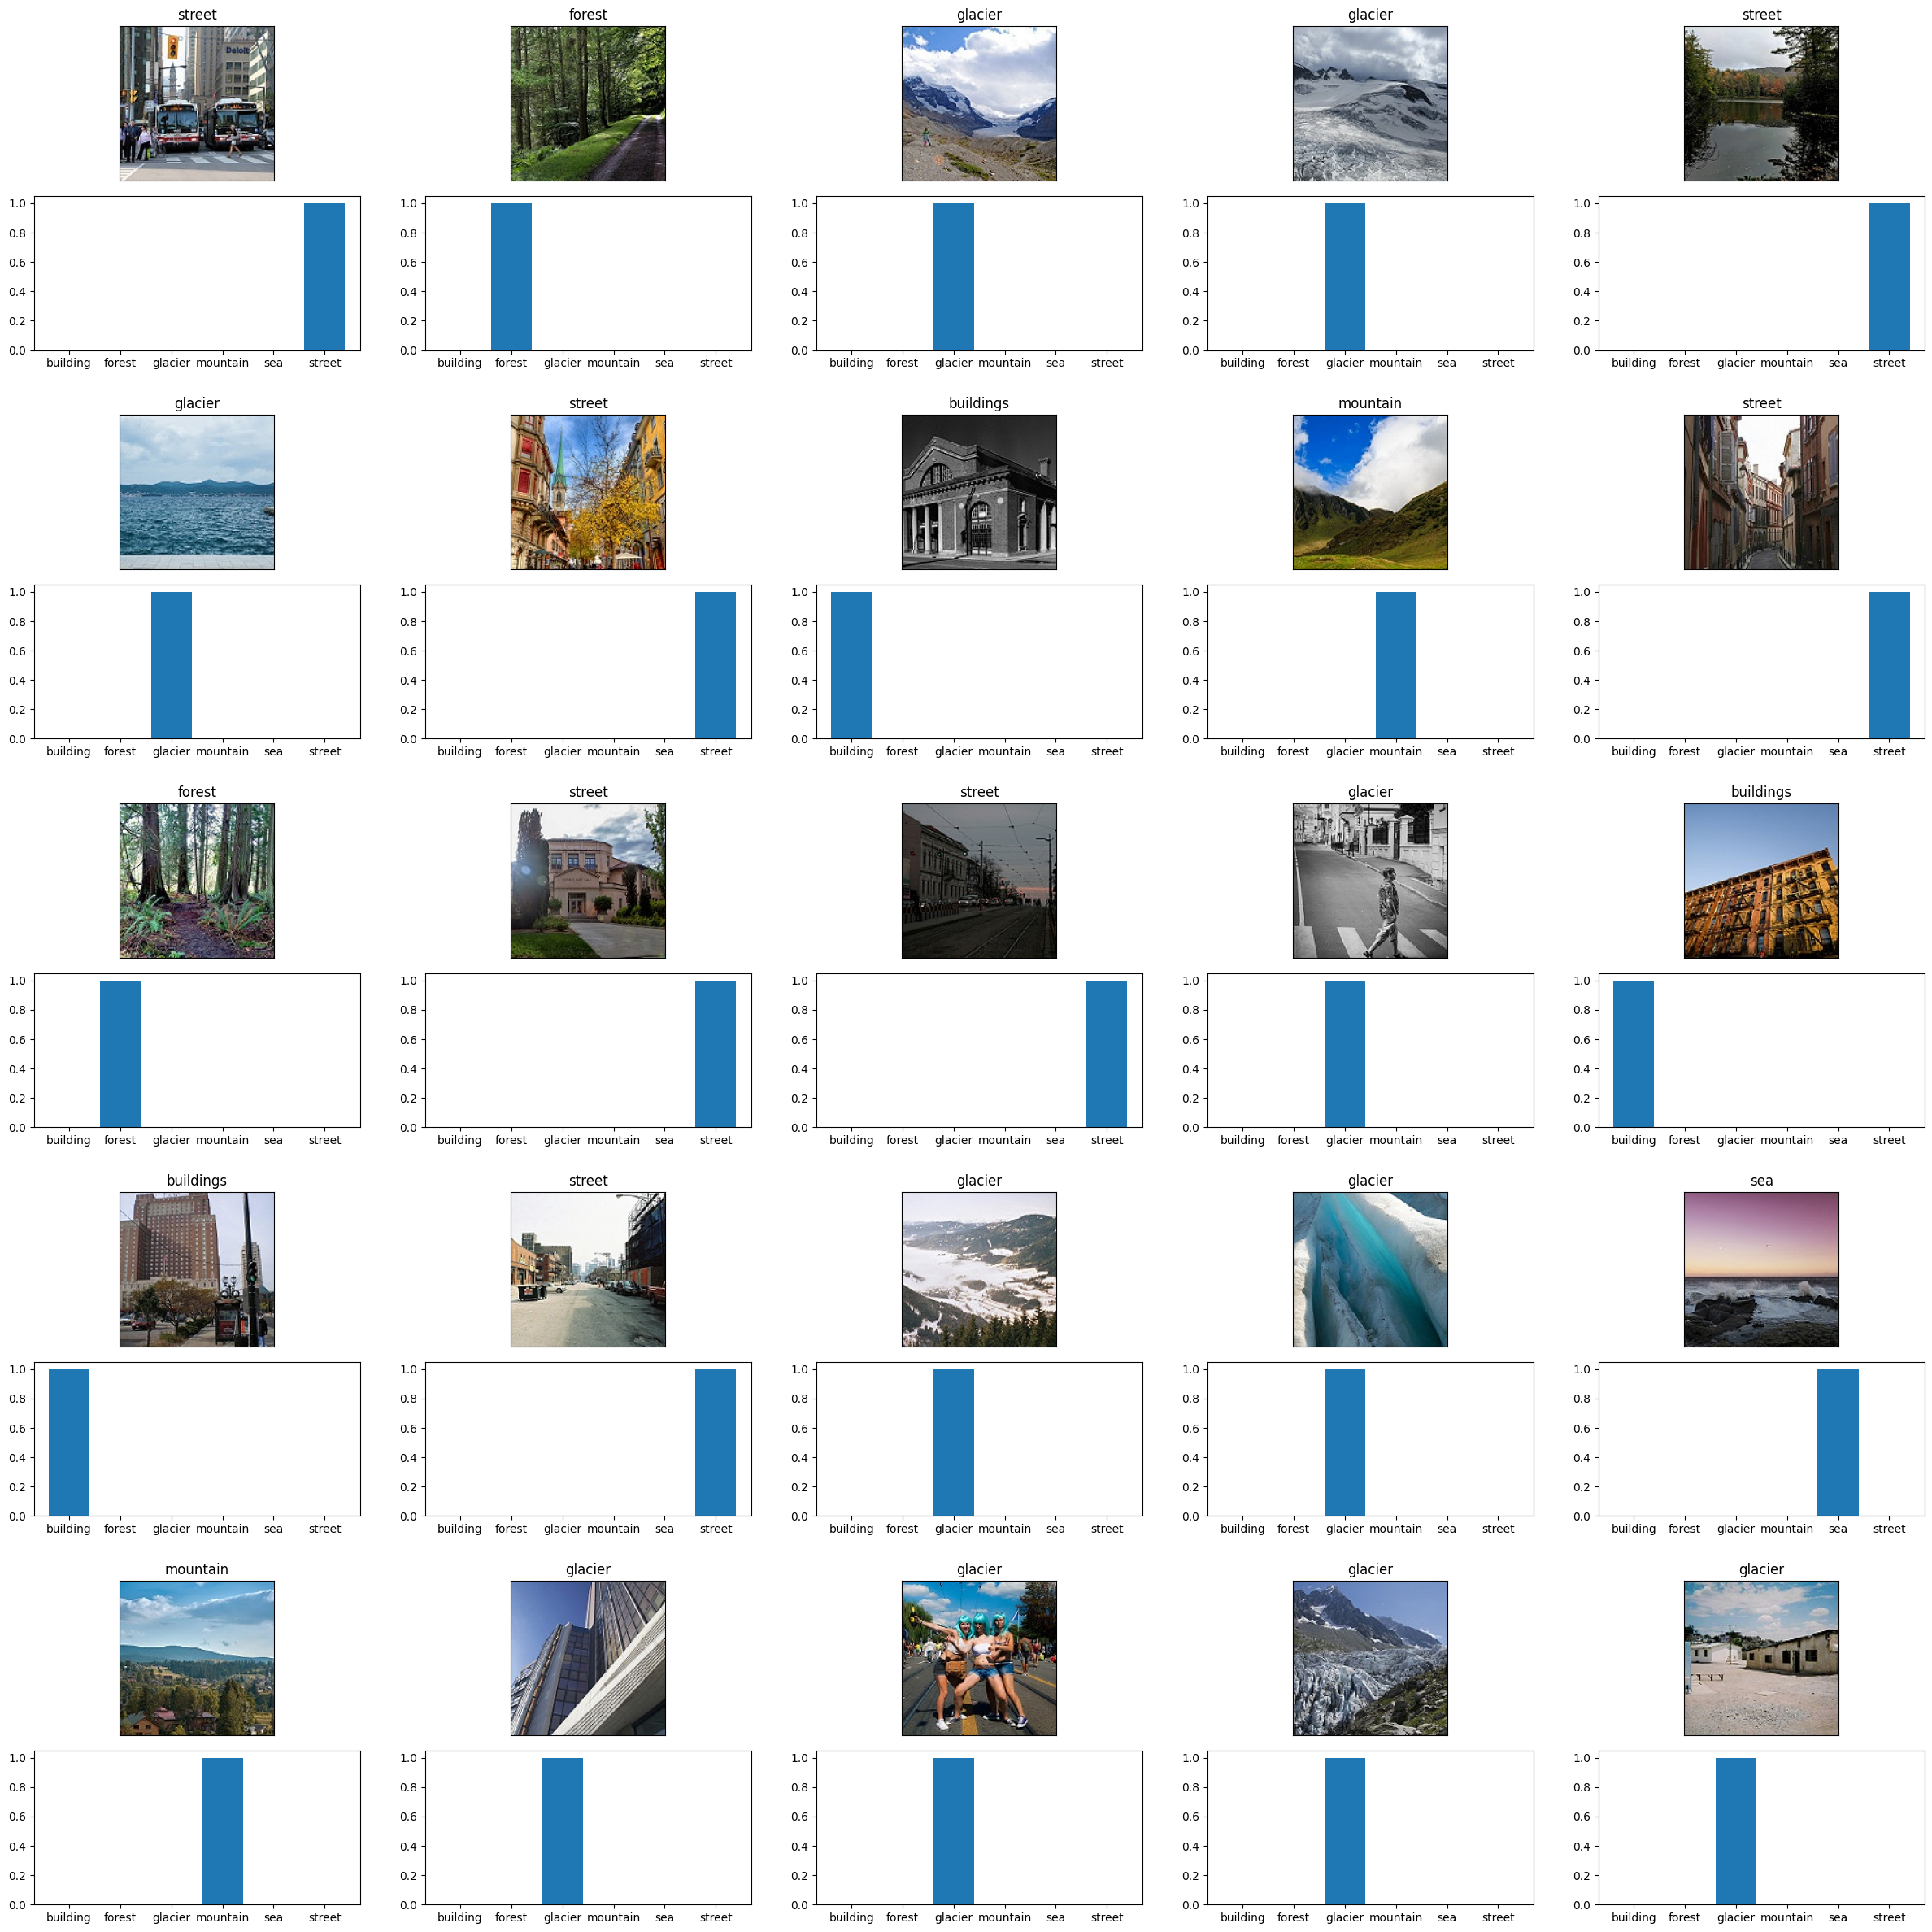

In [47]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

folder_path = 'seg_pred/seg_pred/'
image_files = os.listdir(folder_path)

def get_classlabel(class_index):
    class_labels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
    return class_labels[class_index]

fig = plt.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = np.random.randint(0, len(image_files))
    image_path = os.path.join(folder_path, image_files[rnd_number])
    pred_image = cv2.imread(image_path)
    pred_image = cv2.cvtColor(pred_image, cv2.COLOR_BGR2RGB)
    pred_image = np.array([pred_image])
    pred_class = get_classlabel(np.argmax(model.predict(pred_image), axis=1)[0])
    pred_prob = model.predict(pred_image).reshape(-1)
    
    for j in range(2):
        if j % 2 == 0:
            ax = plt.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plt.Subplot(fig, inner[j])
            ax.bar(range(len(pred_prob)), pred_prob)
            ax.set_xticks(range(len(pred_prob)))
            ax.set_xticklabels(['building', 'forest', 'glacier', 'mountain', 'sea', 'street'])
            fig.add_subplot(ax)

plt.show()
